In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# parallel processing
from multiprocessing import Pool

In [4]:
# samwich routines
from samwich.dataloaders import XarrayData
from samwich.waketrackers import track

In [5]:
# case definition
from study import V27, neutral
from trajectory import Trajectory

# Gaussian 2D analysis

In [6]:
case = neutral(casedir='WAKEBENCH-NREL_DEBNATH_LES/neutral',
               prefix='NREL_DEBNATH_LES_20190325',
               turbine=V27)
name = '2D_Gaussian'

In [34]:
# sampling plane
yrange = (-40,40)
zrange = (0.497933,80.5041)

In [10]:
def moving_median(series, window):
    return series.rolling(window, center=True).median()

## reference data
Approximately 300 s at x=3D, identified using `manual_wake_ID.ipynb`

## process trajectory

In [54]:
traj = Trajectory(case,name)

WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_2D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_3D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_4D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_5D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_6D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_7D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian/trajectory_8D.csv


In [56]:
traj.remove_outliers(yrange,zrange)

x= 54.0 outliers in y/z : 0 0
x= 81.0 outliers in y/z : 8 1
x= 108.0 outliers in y/z : 16 2
x= 135.0 outliers in y/z : 47 9
x= 162.0 outliers in y/z : 103 24
x= 189.0 outliers in y/z : 165 53
x= 216.0 outliers in y/z : 264 96


## filter the time histories

### x=3D
- marginal increase in RMSE for 3-s moving median (MM), more notable increase in RMSE w/ > 5-s MM

In [57]:
yerr3D,zerr3D = {},{}
ywake_ref3, zwake_ref3 = np.loadtxt('wake_centers_3D--manual_ID_5min.csv', unpack=True)
zwake_ref3 -= case.turbine.zhub

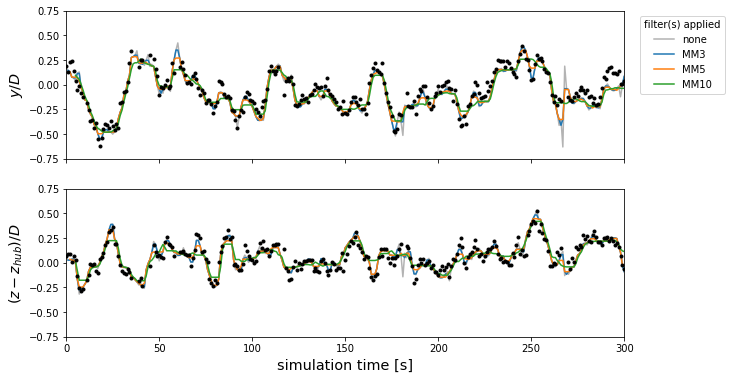

In [58]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(10,6))
default_opts = dict(downstreamD=3.0, norm=True, annotate=False, fig=fig)

# lateral motion
_,_,yerr3D['baseline'] = traj.plot_wake_hist('y',ax=ax[0],
                                             label='none',color='0.7',
                                             ref=ywake_ref3,
                                             **default_opts)
_,_,yerr3D['MM3'] = traj.plot_wake_hist('y',ax=ax[0],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=ywake_ref3,
                                        **default_opts)
_,_,yerr3D['MM5'] = traj.plot_wake_hist('y',ax=ax[0],
                                        applyfilter=lambda s: moving_median(s,5),
                                        label='MM5',
                                        ref=ywake_ref3,
                                        **default_opts)
_,_,yerr3D['MM10'] = traj.plot_wake_hist('y',ax=ax[0],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=ywake_ref3,
                                         **default_opts)

# vertical motion
_,_,zerr3D['baseline'] = traj.plot_wake_hist('z',ax=ax[1],
                                             label='none',color='0.7',
                                             ref=zwake_ref3,
                                             **default_opts)
_,_,zerr3D['MM3'] = traj.plot_wake_hist('z',ax=ax[1],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=zwake_ref3,
                                        **default_opts)
_,_,zerr3D['MM5'] = traj.plot_wake_hist('z',ax=ax[1],
                                        applyfilter=lambda s: moving_median(s,5),
                                        label='MM5',
                                        ref=zwake_ref3,
                                        **default_opts)
_,_,zerr3D['MM10'] = traj.plot_wake_hist('z',ax=ax[1],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=zwake_ref3,
                                         **default_opts)

# reference data
ax[0].plot(ywake_ref3/case.turbine.D, 'k.')
ax[1].plot(zwake_ref3/case.turbine.D, 'k.')

ax[0].set_ylim((-.75,.75))
ax[1].set_ylim((-.75,.75))
ax[0].set_xlim((0,300))
ax[0].set_ylabel(r'$y/D$',fontsize='x-large')
ax[1].set_ylabel(r'$(z-z_{hub})/D$',fontsize='x-large')
ax[1].set_xlabel('simulation time [s]',fontsize='x-large')
ax[0].legend(loc='upper left', bbox_to_anchor=(1.02,1), title='filter(s) applied')

In [59]:
yerr3D, zerr3D

({'baseline': 1.9672287124976193,
  'MM3': 1.9793314709591237,
  'MM5': 2.02756978033707,
  'MM10': 2.370384341826128},
 {'baseline': 1.4092111957302125,
  'MM3': 1.4247538251030822,
  'MM5': 1.5383628329734111,
  'MM10': 2.084012934761707})

### x=6D
- reduction in RMSE for 3-5 s MM
- increase in RMSE for MM >= 10s
- conclusions hold regardless of whether outliers are initially removed

In [60]:
yerr6D,zerr6D = {},{}
ywake_ref6, zwake_ref6 = np.loadtxt('wake_centers_6D--manual_ID_5min.csv', unpack=True)
zwake_ref6 -= case.turbine.zhub

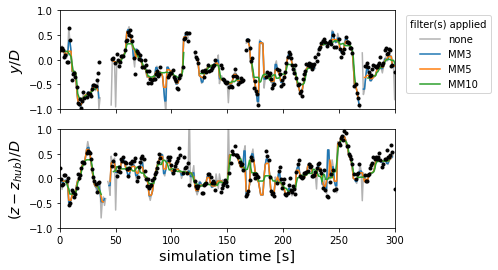

In [68]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(6,4))
default_opts = dict(downstreamD=6.0, norm=True, annotate=False, fig=fig)
yerr6D,zerr6D = {},{}

# lateral motion
_,_,yerr6D['baseline'] = traj.plot_wake_hist('y',ax=ax[0],
                                             label='none',color='0.7',
                                             ref=ywake_ref6,
                                             **default_opts)
_,_,yerr6D['MM3'] = traj.plot_wake_hist('y',ax=ax[0],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=ywake_ref6,
                                        **default_opts)
_,_,yerr6D['MM5'] = traj.plot_wake_hist('y',ax=ax[0],
                                        applyfilter=lambda s: moving_median(s,5),
                                        label='MM5',
                                        ref=ywake_ref6,
                                        **default_opts)
_,_,yerr6D['MM10'] = traj.plot_wake_hist('y',ax=ax[0],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=ywake_ref6,
                                         **default_opts)

# vertical motion
_,_,zerr6D['baseline'] = traj.plot_wake_hist('z',ax=ax[1],
                                             label='none',color='0.7',
                                             ref=zwake_ref6,
                                             **default_opts)
_,_,zerr6D['MM3'] = traj.plot_wake_hist('z',ax=ax[1],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=zwake_ref6,
                                        **default_opts)
_,_,zerr6D['MM5'] = traj.plot_wake_hist('z',ax=ax[1],
                                        applyfilter=lambda s: moving_median(s,5),
                                        label='MM5',
                                        ref=zwake_ref6,
                                        **default_opts)
_,_,zerr6D['MM10'] = traj.plot_wake_hist('z',ax=ax[1],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=zwake_ref6,
                                         **default_opts)

# reference data
ax[0].plot(ywake_ref6/case.turbine.D, 'k.')
ax[1].plot(zwake_ref6/case.turbine.D, 'k.')

ax[0].set_ylim((-1,1))
ax[1].set_ylim((-1,1))
ax[0].set_xlim((0,300))
ax[0].set_ylabel(r'$y/D$',fontsize='x-large')
ax[1].set_ylabel(r'$(z-z_{hub})/D$',fontsize='x-large')
ax[1].set_xlabel('simulation time [s]',fontsize='x-large')
leg = ax[0].legend(loc='upper left', bbox_to_anchor=(1.02,1), title='filter(s) applied')

fig.savefig('figures/wake_position_hist_6D.png',dpi=150,
            bbox_extra_artists=(leg,), bbox_inches='tight')

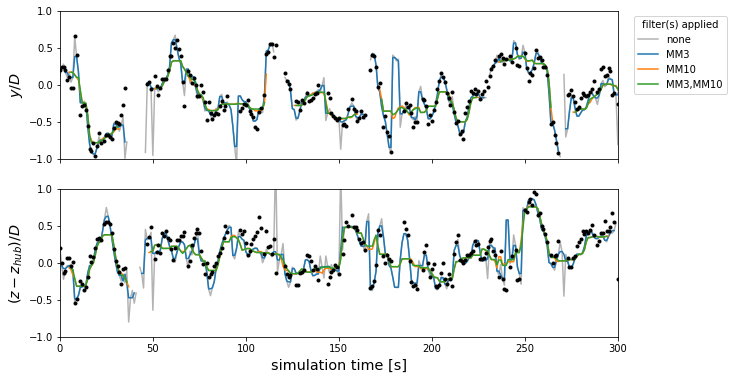

In [62]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(10,6))
default_opts = dict(downstreamD=6.0, norm=True, annotate=False, fig=fig)

# lateral motion
_,_,yerr6D['baseline'] = traj.plot_wake_hist('y',ax=ax[0],
                                             label='none',color='0.7',
                                             ref=ywake_ref6,
                                             **default_opts)
_,_,yerr6D['MM3'] = traj.plot_wake_hist('y',ax=ax[0],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=ywake_ref6,
                                        **default_opts)
_,_,yerr6D['MM10'] = traj.plot_wake_hist('y',ax=ax[0],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=ywake_ref6,
                                         **default_opts)
_,_,yerr6D['MM3,MM10'] = traj.plot_wake_hist('y',ax=ax[0],
                                         applyfilter=lambda s: moving_median(moving_median(s,3),10),
                                         label='MM3,MM10',
                                         ref=ywake_ref6,
                                         **default_opts)

# vertical motion
_,_,zerr6D['baseline'] = traj.plot_wake_hist('z',ax=ax[1],
                                             label='none',color='0.7',
                                             ref=zwake_ref6,
                                             **default_opts)
_,_,zerr6D['MM3'] = traj.plot_wake_hist('z',ax=ax[1],
                                        applyfilter=lambda s: moving_median(s,3),
                                        label='MM3',
                                        ref=zwake_ref6,
                                        **default_opts)
_,_,zerr6D['MM10'] = traj.plot_wake_hist('z',ax=ax[1],
                                         applyfilter=lambda s: moving_median(s,10),
                                         label='MM10',
                                         ref=zwake_ref6,
                                         **default_opts)
_,_,zerr6D['MM3,MM10'] = traj.plot_wake_hist('z',ax=ax[1],
                                         applyfilter=lambda s: moving_median(moving_median(s,3),10),
                                         label='MM3,MM10',
                                         ref=zwake_ref6,
                                         **default_opts)

# reference data
ax[0].plot(ywake_ref6/case.turbine.D, 'k.')
ax[1].plot(zwake_ref6/case.turbine.D, 'k.')

ax[0].set_ylim((-1,1))
ax[1].set_ylim((-1,1))
ax[0].set_xlim((0,300))
ax[0].set_ylabel(r'$y/D$',fontsize='x-large')
ax[1].set_ylabel(r'$(z-z_{hub})/D$',fontsize='x-large')
ax[1].set_xlabel('simulation time [s]',fontsize='x-large')
ax[0].legend(loc='upper left', bbox_to_anchor=(1.02,1), title='filter(s) applied')

In [63]:
yerr6D, zerr6D

({'baseline': 3.095455251794336,
  'MM3': 2.8876225207972435,
  'MM5': 2.8981189212890546,
  'MM10': 3.920611232676519,
  'MM3,MM10': 3.914920445218677},
 {'baseline': 4.34779356257987,
  'MM3': 3.4273465544556223,
  'MM5': 3.3884606685197562,
  'MM10': 4.614228817240652,
  'MM3,MM10': 4.644910228148435})

In [ ]:
# RMSE w/o removing outliers:
# ({'baseline': 4.3066284363708665,
#   'MM3': 3.3545897419555053,
#   'MM5': 3.5549679362854794,
#   'MM10': 4.677521214931967,
#   'MM3,MM10': 4.406838300300164},
#  {'baseline': 5.564852189862872,
#   'MM3': 3.660078369386628,
#   'MM5': 3.5649350948543845,
#   'MM10': 4.737874011877079,
#   'MM3,MM10': 4.754395458354702})